Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [8]:
# Load the dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\Strathmore\DSA Units\2nd Semester\DSA 8201 Research Methods for Data Science and Analytics\Project\student_dropout_data_with_additional_attributes.csv')

In [10]:
# Display the first 5 rows
df.head()

,Age,Gender,Num_Siblings,Family_Size,Family_Income,Parental_Education,Parent_Occupation,Access_to_Resources,Type_of_Housing,Grade_Math,...,Location,Dropout,Boarding_Status,Technology_Access,Socioeconomic_Status,Teacher_Student_Ratio,School_Infrastructure_Score,School_Funding_Level,Average_Class_Size,Average_Performance
0,17,Male,2,4,8.863559,Primary,Agriculture,Yes,Own,87.572424,...,Rural,False,Day-school,High,Middle,21.516851,89.025437,Low,35.506157,62.210390
1,18,Male,4,6,9.290234,Tertiary,Formal Sector,Yes,Own,45.049519,...,Rural,False,Day-school,Medium,Low,24.433649,31.354119,Low,38.799322,61.838993
2,16,Female,1,3,11.078113,Secondary,Agriculture,Yes,Own,56.853624,...,Urban,False,Day-school,Medium,Low,28.240244,28.424973,Low,40.632662,70.235653
3,18,Female,1,3,27.071631,Secondary,Formal Sector,Yes,Own,71.975120,...,Urban,False,Day-school,Medium,Middle,22.998542,77.266849,High,34.851073,73.847675
4,18,Male,6,8,0.448112,Primary,Formal Sector,No,Own,51.645974,...,Rural,True,Boarding,Medium,Low,19.377884,99.842347,High,46.116631,68.016078


Step 3: Inspect the Dataset  
3.1 Check Basic Information

In [14]:
# Check the shape of the dataset (rows, columns)
print(f"Dataset Shape: {df.shape}")

# Check column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

Dataset Shape: (10000, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Gender                         10000 non-null  object 
 2   Num_Siblings                   10000 non-null  int64  
 3   Family_Size                    10000 non-null  int64  
 4   Family_Income                  10000 non-null  float64
 5   Parental_Education             10000 non-null  object 
 6   Parent_Occupation              10000 non-null  object 
 7   Access_to_Resources            10000 non-null  object 
 8   Type_of_Housing                10000 non-null  object 
 9   Grade_Math                     10000 non-null  float64
 10  Grade_Science                  10000 non-null  float64
 11  Grade_English                  10000 non-null  float64
 12  Overall_GPA         

3.2 Descriptive Statistics

In [19]:
# Get summary statistics for numerical columns
print(df.describe())

                Age  Num_Siblings   Family_Size  Family_Income    Grade_Math  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean      16.499900      3.027300      5.027300      53.797609     59.965044   
std        1.708711      1.989158      1.989158     157.007471     14.877066   
min       14.000000      0.000000      2.000000       0.019815      8.680570   
25%       15.000000      1.000000      3.000000       6.281930     49.750562   
50%       17.000000      3.000000      5.000000      17.284932     59.919543   
75%       18.000000      5.000000      7.000000      48.583439     70.151501   
max       19.000000      6.000000      8.000000    8092.548866    125.348768   

       Grade_Science  Grade_English   Overall_GPA  Attendance_Rate  \
count   10000.000000   10000.000000  10000.000000     10000.000000   
mean       65.090573      70.475229     65.176949        79.929091   
std        14.794580      14.909557      8.472513         9.807874   

In [21]:
# Get summary statistics for categorical columns
print(df.describe(include=['object']))

        Gender Parental_Education Parent_Occupation Access_to_Resources  \
count    10000              10000             10000               10000   
unique       2                  4                 4                   2   
top     Female          Secondary       Agriculture                 Yes   
freq      5011               3977              4002                5923   

       Type_of_Housing Participation_Extracurricular Mode_of_Transportation  \
count            10000                         10000                  10000   
unique               2                             2                      4   
top                Own                            No                Walking   
freq              7001                          5902                   3931   

       School_Type School_Quality School_Attendance_Policy  \
count        10000          10000                    10000   
unique           3              3                        3   
top          Mixed            Low         

Step 4: Data Cleaning  
4.1 Handle Missing Value       s
If there are missing values, decide how to handle them (e.g., drop or impute).

In [28]:
# Drop rows with missing values (if necessary)
df.dropna(inplace=True)

#Impute missing values in 'Family_Income' with the mean
df['Family_Income'].fillna(df['Family_Income'].mean(), inplace=True)

4.2 Handle Duplicates

In [31]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


4.3 Encode Categorical Variables  
Machine learning models require numerical input, so encode categorical variables.

In [36]:
# Encode binary categorical variables (e.g., Gender, Boarding_Status)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Boarding_Status'] = df['Boarding_Status'].map({'Boarding': 1, 'Day-school': 0})

# Encode multi-class categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['School_Type', 'Technology_Access', 'Socioeconomic_Status', 'School_Funding_Level'], drop_first=True)

In [38]:
df.head()

,Age,Gender,Num_Siblings,Family_Size,Family_Income,Parental_Education,Parent_Occupation,Access_to_Resources,Type_of_Housing,Grade_Math,...,Average_Class_Size,Average_Performance,School_Type_Girls Only,School_Type_Mixed,Technology_Access_Low,Technology_Access_Medium,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,School_Funding_Level_Low,School_Funding_Level_Medium
0,17,1,2,4,8.863559,Primary,Agriculture,Yes,Own,87.572424,...,35.506157,62.210390,False,False,False,False,False,True,True,False
1,18,1,4,6,9.290234,Tertiary,Formal Sector,Yes,Own,45.049519,...,38.799322,61.838993,False,True,False,True,True,False,True,False
2,16,0,1,3,11.078113,Secondary,Agriculture,Yes,Own,56.853624,...,40.632662,70.235653,False,True,False,True,True,False,True,False
3,18,0,1,3,27.071631,Secondary,Formal Sector,Yes,Own,71.975120,...,34.851073,73.847675,False,True,False,True,False,True,False,False
4,18,1,6,8,0.448112,Primary,Formal Sector,No,Own,51.645974,...,46.116631,68.016078,False,True,False,True,True,False,False,False


Step 5: Data Visualization  
5.1 Visualize Target Variable (Dropout)

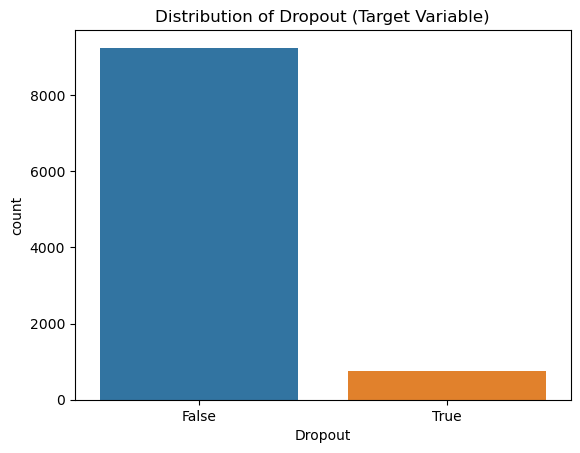

In [41]:
# Plot the distribution of the target variable
sns.countplot(x='Dropout', data=df)
plt.title('Distribution of Dropout (Target Variable)')
plt.show()